In [1]:
import matplotlib.pyplot as plt 
from torchvision.transforms import ToPILImage
from PIL import Image
import numpy as np

### List all available pre-trained models of MMSegmentation
#### Check which models are available for Potsdam and LoveDA

In [2]:
from mmseg.apis import MMSegInferencer
# models is a list of model names, and them will print automatically
models = MMSegInferencer.list_models('mmseg')

06/05 09:25:21 - mmengine - INFO - model_name: ann_r50-d8_4xb2-40k_cityscapes-512x1024
model_name: ann_r101-d8_4xb2-40k_cityscapes-512x1024
model_name: ann_r50-d8_4xb2-40k_cityscapes-769x769
model_name: ann_r101-d8_4xb2-40k_cityscapes-769x769
model_name: ann_r50-d8_4xb2-80k_cityscapes-512x1024
model_name: ann_r101-d8_4xb2-80k_cityscapes-512x1024
model_name: ann_r50-d8_4xb2-80k_cityscapes-769x769
model_name: ann_r101-d8_4xb2-80k_cityscapes-769x769
model_name: ann_r50-d8_4xb4-80k_ade20k-512x512
model_name: ann_r101-d8_4xb4-80k_ade20k-512x512
model_name: ann_r50-d8_4xb4-160k_ade20k-512x512
model_name: ann_r101-d8_4xb4-160k_ade20k-512x512
model_name: ann_r50-d8_4xb4-20k_voc12aug-512x512
model_name: ann_r101-d8_4xb4-20k_voc12aug-512x512
model_name: ann_r50-d8_4xb4-40k_voc12aug-512x512
model_name: ann_r101-d8_4xb4-40k_voc12aug-512x512
model_name: apcnet_r50-d8_4xb2-40k_cityscapes-512x1024
model_name: apcnet_r101-d8_4xb2-40k_cityscapes-512x1024
model_name: apcnet_r50-d8_4xb2-40k_cityscapes-76

In [3]:
print(f"There are in total {len(models)} models available in the model zoo")
print('Available Potsdam Model Weights:')
display([model for model in models if 'potsdam' in model])
print('Available LoveDA Model Weights:')
display([model for model in models if 'loveda' in model])
print('Available iSaid Model Weights:')
display([model for model in models if 'isaid' in model])

There are in total 620 models available in the model zoo
Available Potsdam Model Weights:


['deeplabv3plus_r18-d8_4xb4-80k_potsdam-512x512',
 'deeplabv3plus_r50-d8_4xb4-80k_potsdam-512x512',
 'deeplabv3plus_r101-d8_4xb4-80k_potsdam-512x512',
 'fcn_hr18s_4xb4-80k_potsdam-512x512',
 'fcn_hr18_4xb4-80k_potsdam-512x512',
 'fcn_hr48_4xb4-80k_potsdam-512x512',
 'pspnet_r18-d8_4xb4-80k_potsdam-512x512',
 'pspnet_r50-d8_4xb4-80k_potsdam-512x512',
 'pspnet_r101-d8_4xb4-80k_potsdam-512x512']

Available LoveDA Model Weights:


['deeplabv3plus_r18-d8_4xb4-80k_loveda-512x512',
 'deeplabv3plus_r50-d8_4xb4-80k_loveda-512x512',
 'deeplabv3plus_r101-d8_4xb4-80k_loveda-512x512',
 'fcn_hr18s_4xb4-80k_loveda-512x512',
 'fcn_hr18_4xb4-80k_loveda-512x512',
 'fcn_hr48_4xb4-80k_loveda-512x512',
 'pspnet_r18-d8_4xb4-80k_loveda-512x512',
 'pspnet_r50-d8_4xb4-80k_loveda-512x512',
 'pspnet_r101-d8_4xb4-80k_loveda-512x512']

Available iSaid Model Weights:


['deeplabv3plus_r18-d8_4xb4-80k_isaid-896x896',
 'deeplabv3plus_r50-d8_4xb4-80k_isaid-896x896',
 'fcn_hr18s_4xb4-80k_isaid-896x896',
 'fcn_hr18_4xb4-80k_isaid-896x896',
 'fcn_hr48_4xb4-80k_isaid-896x896',
 'pspnet_r18-d8_4xb4-80k_isaid-896x896',
 'pspnet_r50-d8_4xb4-80k_isaid-896x896']

### Test Inference with PSPNet_R101_D8 on Potsdam

In [4]:
from mmseg.apis import MMSegInferencer
# Load model in background from model zoo
inferencer = MMSegInferencer(model='pspnet_r101-d8_4xb4-80k_potsdam-512x512')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r101-d8_4x4_512x512_80k_potsdam/pspnet_r101-d8_4x4_512x512_80k_potsdam_20211220_125612-aed036c4.pth


/pfs/work7/workspace/scratch/tu_zxmav84-ds_project/conda/envs/DS_Project/lib/python3.10/site-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/pfs/work7/workspace/scratch/tu_zxmav84-ds_project/conda/envs/DS_Project/lib/python3.10/site-packages/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


06/05 09:25:24 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.
06/05 09:25:24 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


### Visualize Inference on Potsdam Example

In [5]:
RGB_classes = [
       (255, 255, 255), # impervious surfaces
       (0,  0, 255), # building
       (0, 255, 255), # low vegetation
       (0,  255,  0), # tree
       (255, 255, 0), # car
       (255, 0, 0)] # clutter/background
Label_classes = [
    "impervious surfaces",
    "building",
    "low vegetation",
    "tree",
    "car",
    "clutter/background"]

idx2label = {key: value for key, value in enumerate(Label_classes)}
idx2rgb = {key: value for key, value in enumerate(RGB_classes)}
def map_label2rgb(label_mask:np.array):
    """
    Maps a label mask to an RGB mask using an index-to-color mapping.

    Args:
        label_mask (np.array): A label mask represented as a NumPy array.
                               The label mask contains integer values representing the labels.

    Returns:
        np.array: An RGB mask represented as a NumPy array.
                  The RGB mask has the same shape as the input label mask and contains
                  color values represented as (R, G, B) tuples.
    
    """
    rgb = np.zeros((label_mask.shape[0], label_mask.shape[1], 3), dtype='uint8')
    for i in range(label_mask.shape[0]):
        for j in range(label_mask.shape[1]):
            try:
                rgb[i,j,:] = idx2rgb[label_mask[i,j].item()]
            except:
                rgb[i,j,:] = [0,0,0]
    return rgb

Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   

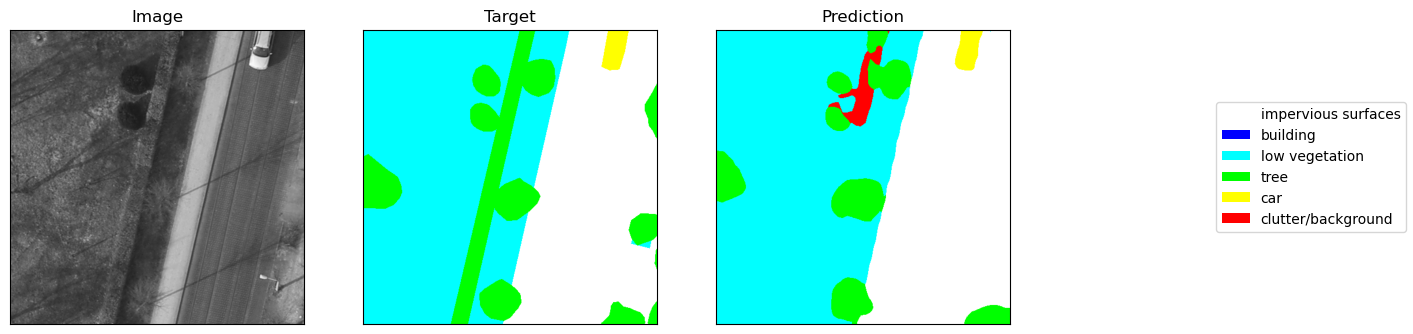

In [19]:
test_image = '2_13_1536_0_2048_512.png'
img_path = '/pfs/work7/workspace/scratch/tu_zxmav84-ds_project/data/potsdam_mmseg/img_dir/val/' + test_image
ann_path = '/pfs/work7/workspace/scratch/tu_zxmav84-ds_project/data/potsdam_mmseg/ann_dir/val/' + test_image

# Load image
img = Image.open(img_path)
# Load target
target = Image.open(ann_path)
target_rgb = map_label2rgb(np.array(target) - 1) # Minus one needed, since label indexing in MMSegmentation is different than original Potsdam convention

# Get inference from image
pred = inferencer(img_path, show=True)
mask = pred['predictions']
mask_rgb = map_label2rgb(mask)

# Visualize inference
fig, ax = plt.subplots(1,3, figsize = (16,12))
ax[0].imshow(img)
ax[0].set_title('Image')
ax[1].imshow(target_rgb)
ax[1].set_title('Target')
ax[2].imshow(mask_rgb)
ax[2].set_title('Prediction')

# Extract colors and labels from the dictionary
colors = [(r / 255, g / 255, b / 255, 1) for r, g, b in idx2rgb.values()]
labels = [str(idx2label[key]) for key in idx2rgb]

# Create a legend using the extracted colors and labels
patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
fig.legend(patches, labels, loc=7)
fig.subplots_adjust(right=0.75)

[ax[i].get_xaxis().set_ticks([]) for i in range(ax.shape[0])]
[ax[i].get_yaxis().set_ticks([]) for i in range(ax.shape[0])]
plt.show()

### Test Inference on Munich

Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   

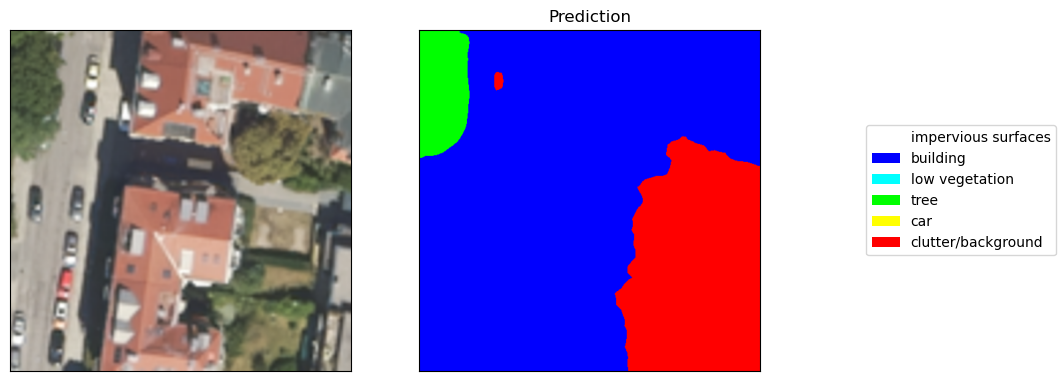

In [31]:
img_path = '/pfs/work7/workspace/scratch/tu_zxmav84-ds_project/data/orthophotos/patched/32692_5337_patch_2_9.tif'

#  Read Image
img = Image.open(img_path)
img = img.resize((512, 512))
img.save('resized.png')

# Get prediction
pred = inferencer('resized.png', show=True)
mask = pred['predictions']
mask_rgb = map_label2rgb(mask)

# Visualize prediction
fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(img)
ax[1].imshow(mask_rgb)
ax[1].set_title('Prediction')

# Extract colors and labels from the dictionary
colors = [(r / 255, g / 255, b / 255, 1) for r, g, b in idx2rgb.values()]
labels = [str(idx2label[key]) for key in idx2rgb]

# Create a legend using the extracted colors and labels
patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
fig.legend(patches, labels, loc=7)
fig.subplots_adjust(right=0.75)

[ax[i].get_xaxis().set_ticks([]) for i in range(ax.shape[0])]
[ax[i].get_yaxis().set_ticks([]) for i in range(ax.shape[0])]
plt.show()